# Predicting Litecoin prices using Bitcoin historical prices

### A Linear Regression approach based on Gradient Descent

I was doing some research on Deep Learning, and stumbled upon very interesting concept of Gradient Descent.

The following code is an example of how Gradient Descent works to find a Regression line.

Quick recap for Linear Regression:
The aim of Linear Regression is to find a regression line such that:

`y_hat = mx + b`

ie. we can **predict the value of y** for any x once we have the variables m and b (the slope and the intercept of the regression line)

Gradient Descent is basically a mathematical optimization to reach the local minima of our loss function. It works as follows:

1) At every value of the weights, we find the predicted value using that weight. 
2) Then we find the error using a loss function. In this example, I've used the Mean Squared Error. 
3) Once we know the error, we tune the weights such that the error is minimized. Our goal is to achieve the minimum error, which is the local minima. (for convex functions, local minima = global minima)
4) To know whether to increase or decrease the weight to achieve this minimization, we use partial derivatives. The partial derivative of each parameter gives us a direction in which we need to tune the weights.
5) We tune the parameters by changing their values with respect to the values of the partial derivatives.
5) The tuning stops once the partial derivative value is 0, that is, local minima is achieved or the most optimal weight is found.

The model here is used to predict Litecoin prices based on Bitcoin prices.
The dataset I've used is from Kaggle, and contains LTC, BTC prices from April 2013 till September 2017.

We find a almost 100% positive correlation in the two variables. The intercept b has a miniscule value of -0.00005 with a slope of 0.013, rightly so, since LTC prices are much lower than BTC.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def mse(b, m , data):
    sumerror = 0
    for i in range(0, len(data)):
        x = data['btc'][i]
        y = data['ltc'][i]
        sumerror += (y - (m * x + b)) ** 2
    return sumerror / float(len(data))

In [6]:
def gradient_descent(b_current, m_current, data, learning_rate):
    
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    
    for i in range(0, len(data)):
        x = data['btc'][i]
        y = data['ltc'][i]
        # partial derivative of the rmse of y - y_hat 
        # where y_hat = m_current * x + b_current
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    
    # trying to reach the minima by changing b, m in steps of b_gradient, m_gradient
    # learning rate decides how fast / slow we want to fit the model
    # here, a learning rate of 0.001 means we descend the gradient in steps of a multiplicative factor of 0.001
    b_new = b_current - ((learning_rate/N) * b_gradient)
    m_new = m_current - ((learning_rate/N) * m_gradient)
    
    return [b_new, m_new]

In [7]:
def initialize_gradient_descent(b, m, data, learning_rate, iterations):

    for i in range(iterations):
        b, m = gradient_descent(b, m, data, learning_rate)
        if i % 100 == 0:
            print "Values at Iteration {0}: b = {1}, m = {2}, error = {3}".format(i, b, m, mse(b,m,data))
    return [b, m]

In [8]:
data = pd.read_csv("ltcbtc.csv")
data = data[['ltc', 'btc']]

# equation of line to be fitted: y = mx + b
initial_b = 0
initial_m = 0

# hyperparameters
learning_rate = 0.0001
iterations = 1000

print "Initial Values: b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, mse(initial_b, initial_m, data))
print "Running..."
[b,m] = initialize_gradient_descent(initial_b, initial_m, data, learning_rate, iterations)
print "Optimal Values: b = {0}, m = {1}, error = {2}".format(b, m, mse(b, m, data))


Initial Values: b = 0, m = 0, error = 242.586444624
Running...
Values at Iteration 0: b = 1.1229855679e-06, m = 0.00191580753682, error = 187.657550605
Values at Iteration 100: b = 2.19353670376e-06, m = 0.0137086470412, error = 31.2994935623
Values at Iteration 200: b = -4.03165032753e-06, m = 0.0137086543122, error = 31.2994873269
Values at Iteration 300: b = -1.0256795393e-05, m = 0.0137086581635, error = 31.2994810916
Values at Iteration 400: b = -1.64818963772e-05, m = 0.0137086620147, error = 31.2994748565
Values at Iteration 500: b = -2.27069532804e-05, m = 0.0137086658659, error = 31.2994686214
Values at Iteration 600: b = -2.89319661031e-05, m = 0.0137086697171, error = 31.2994623864
Values at Iteration 700: b = -3.51569348455e-05, m = 0.0137086735683, error = 31.2994561515
Values at Iteration 800: b = -4.13818595079e-05, m = 0.0137086774194, error = 31.2994499166
Values at Iteration 900: b = -4.76067400906e-05, m = 0.0137086812705, error = 31.2994436819
Optimal Values: b = -5

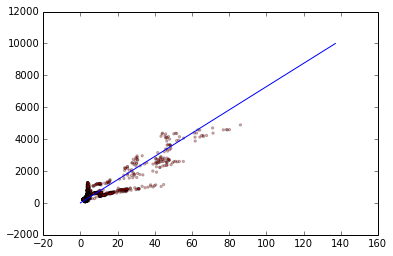

In [9]:
%matplotlib inline
x = [i for i in range(0,10001) if i%1000 == 0]
y = [i*m for i in range(0,10001) if i%1000 == 0]

plt.scatter(data['ltc'], data['btc'], c= 'r', alpha = 0.3, marker = '.')
plt.plot(y,x)
plt.show()

In the graph above, the scatter points are the observed LTC/BTC prices and the blue line is the regression line that we achieved using Gradient Descent.